# comparing images + metrics to h5 files
basically fine tuning  the cleaning + seperating of images

ahhhh fuckkkk, this is to find the truncated particles 
this code is initally to send to Jonny containing some particles, so he can check the truncation

#### !!!! importantly this is only working on ch_0 220730153000 !!!!

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from glob import glob
import seaborn as sns
import xesmf as xe
import pandas as pd
import seaborn as sns
#import def_homebrew as hb ## homemade functions xox
from scipy.special import gamma
import netCDF4 as nc
from datetime import datetime, timedelta

import h5py ####
from PIL import Image
#from IPython.display import display #
#import cv2 # not working
import os
import shutil

from scipy.ndimage import convolve, label
from skimage.measure import regionprops, find_contours
from scipy.spatial import ConvexHull, distance_matrix
from skimage.morphology import remove_small_holes ## remove holes <3
from scipy.ndimage import binary_fill_holes
from skimage import measure
from cv2 import cvtColor, COLOR_BGR2GRAY, threshold, THRESH_BINARY, THRESH_OTSU

In [2]:
#saved = '/gws/nopw/j04/dcmex/users/ezriab/processed_images/2ds/flight_220730153000/'
#path = '/gws/nopw/j04/dcmex/users/ezriab/processed_stats/ch_0/'
path = '/gws/nopw/j04/dcmex/users/ezriab/processed_images/2ds/ch_0/220730153000/' ## for stats file

h5_path = '/gws/nopw/j04/dcmex/users/ezriab/raw_h5/2ds/ch_0/Export_base220730153000.h5'

#csv_name = 'merged_stats_habits.csv'
#csv_name = 'flight_220719154358.csv'
csv_name = '220730153000_stats_habits.csv'
df = pd.read_csv(path+csv_name)
#trun_image_loc = '/gws/nopw/j04/dcmex/users/ezriab/processed_images/2D-S/trunc/'
df['name'] = df['name'].str.replace('_ch_0', '', regex=False)

In [8]:
file_names = 'Export_base220730153000.h5'
date_str = file_names[-15:-9]



'30'

In [3]:
df

,name,date,slice_s_idx,slice_e_idx,start_time,end_time,d_max,d_min,orientation,centroid,...,Category,CA,Co,CC,CBC,CG,HPC,Dif,FA,WD
0,1000081_1,220730,1000081,1000392,19:17:23.301000000,19:17:23.301000000,3258.403608,40.236194,-1.569667,"(2.304301075268817, 126.18494623655914)",...,Co,0.0,1.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
1,1001384_1,220730,1001384,1001959,19:17:28.901000000,19:17:28.901000000,5989.083399,51.670406,1.567242,"(2.4518360830228847, 220.50186269292178)",...,Co,0.0,1.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
2,1002210_1,220730,1002210,1002281,19:17:28.901000000,19:17:28.901000000,709.747294,217.266005,-1.436207,"(13.59194214876033, 37.025826446280995)",...,Co,0.0,1.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
3,1002353_1,220730,1002353,1003004,19:17:28.901000000,19:17:28.901000000,5666.177482,824.256843,-1.348257,"(62.72577991977143, 314.0045597529653)",...,CG,0.0,0.0,0.0,0.0,1.0,1.347993e-10,0.0,0.0,0.0
4,1003804_1,220730,1003804,1003840,19:17:33.644000000,19:17:33.644000000,387.660928,54.675581,1.511037,"(3.730769230769231, 12.634615384615385)",...,Co,0.0,1.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5496,998901_1,220730,998901,998960,19:16:26.642000000,19:16:42.647000000,539.116175,324.689569,-1.442213,"(16.020881670533644, 25.754833720030934)",...,CG,0.0,0.0,0.0,0.0,1.0,0.000000e+00,0.0,0.0,0.0
5497,998981_1,220730,998981,999332,19:16:48.638000000,19:17:04.643000000,3149.313350,1249.300992,-1.435933,"(59.19762702288228, 162.4492110254651)",...,CBC,0.0,0.0,0.0,1.0,0.0,0.000000e+00,0.0,0.0,0.0
5498,999333_1,220730,999333,999567,19:17:04.643000000,19:17:14.643000000,2232.943917,399.904769,1.456554,"(21.181970203709334, 132.20462146549104)",...,Co,0.0,1.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
5499,999568_1,220730,999568,999777,19:17:14.643000000,19:17:17.638000000,1953.041937,285.393768,1.551880,"(16.51492902594224, 102.96133137542829)",...,Co,0.0,1.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0


In [4]:
f2ds = h5py.File(h5_path,'r')

ds_image = f2ds['ImageData'] # shape (128, 200000) --> 128 pixels width, 200000 length
ds_time = f2ds['ImageTimes'] # shape (100000, 3) --> (rows, columns) related to time

# make time variable -> 3 seperate columns
og_t_xr = xr.Dataset({'ImageTimes': (('data', 'time_vars'),ds_time)})
sec_since = og_t_xr['ImageTimes'][:,0] # seconds since midnight UTC
pixel_slice = og_t_xr['ImageTimes'][:,1] # number of slices of pixel per image (contain -1, to fill)
# we can use pixel slice to correcly divide up data ^ the index to call f2ds['ImageData']
# these slices have been pre-determined by Jonny + algorithm he has written 

bit_time = og_t_xr['ImageTimes'][:,2] # 32 bit (instrument things) - not useful
## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# do cumulative sum of pixel slices -> can use this as index to slice + extract single crystals
pix_sum = pixel_slice.cumsum(dim='data', dtype ='int')

# shove together into a useful xarray 
time_xr = xr.Dataset({
    'sec_since': sec_since,
    'pixel_slice': pixel_slice,
    'bit_time': bit_time,
    'pix_sum': pix_sum})

In [5]:
def calc_truncation(a_slice, particle):
    # the intial slice is the raw 2ds data - of whole array, and particle is one selected by regionprops (and has to be 1s + 0s)
    ## assume slices are small + don't contain too many odd bits
    # first convert to 0 and 1 for calculation of truncation
    alt_crystal = np.where(a_slice == 255, 0, 1) # i.e. 255 (blank area)=0, and where crystal is (was 0) = 1
    # so sum up number of particle pixels are on the edge of the slice
    first_diode = sum(alt_crystal[0,:]) 
    last_diode = sum(alt_crystal[-1,:])

    ## this calculates how many pixels are top / bottom of the particle + then infer number pixels touching
    top_particle = np.sum(particle[0] == 1)
    bottom_particle = np.sum(particle[-1] == 1)

    n_top, n_bottom = 0, 0  # Initialize variables, default 0 when conditions are not met

    # Top pixel touching logic
    if first_diode != 0 and first_diode >= top_particle:
        n_top = top_particle
    elif first_diode == 0:
        n_top = 0

    # Bottom pixel touching logic
    if last_diode != 0 and last_diode >= bottom_particle:
        n_bottom = bottom_particle
    elif last_diode == 0:
        n_bottom = 0
        
    return n_top, n_bottom # number pixels touching top / bottom respectively


## function to calculate truncation of particle
def calc_truncation_lol(particle_coords):
    # so much simpler, looking at list of coordinates making up a particle,
    # then summing ones in 0 and 127 row - i.e. first + last diode
    lst_first_diode = [coord for coord in particle_coords if coord[0] == 0]
    lst_last_diode = [coord for coord in particle_coords if coord[0] == 127]

    n_top = len(lst_first_diode)
    n_bottom = len(lst_last_diode)
    
    return n_top, n_bottom  # number of pixels touching top / bottom respectively


def stats_description(bw_crystal, fill_hole_thresh):
    #take binary image, fill in small holes and returns object containing stats about crystal
    
    filled_particle = remove_small_holes(bw_crystal.image, area_threshold=fill_hole_thresh) # fill in voids within binary image - better estimation of stats # may need to be altered
    
    # can see the filled in particle if needs be
    #plt.imshow(filled_particle, cmap='gray')
    
    if filled_particle.shape[0] < 2 or filled_particle.shape[1] < 2:
        return filled_particle, None
        
    contours = measure.find_contours(filled_particle, 0.5)
    if contours:
        contour = max(contours, key=lambda x: x.shape[0])  # Sort contours by area (largest first) and select the largest contour
        
        labeled_image = measure.label(filled_particle)  # Label the image based on the threshold
        region = measure.regionprops(labeled_image)[0]  # Assumes largest labeled region corresponds to largest contour
        
        return filled_particle, region
    else:
        return filled_particle, None

## first bits messing around

In [ ]:
## this code copy images from og saving location -> new directory, based on category
# list of rows where categories are CBC (this is where lot of truncated images were)
CBC_category_df = df[df['Category'] == 'CBC']

## get the particle names
CBC_names = CBC_category_df['name']

In [4]:
# through and copy images to new directory 
for name in CBC_names:
    pic = f'{saved}{name}.png'
    shutil.copy(pic, trun_image_loc)

In [5]:
if os.path.exists(trun_image_loc):
    # get string of full path + filenames in specif location
    file_list = glob(trun_image_loc+'*.png') 
    
    # just get file names
    file_names = [os.path.basename(file_path) for file_path in file_list]

134526_4.png


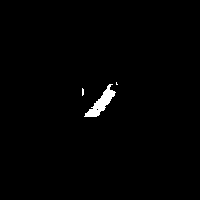

170295_4.png


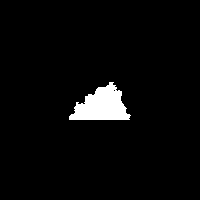

17443_1.png


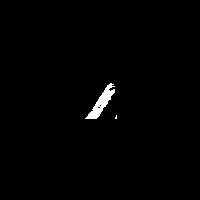

186932_5.png


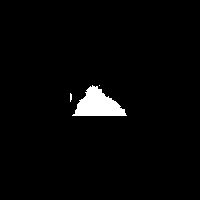

213859_1.png


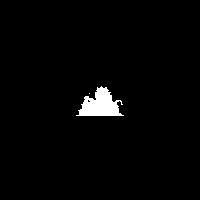

214550_1.png


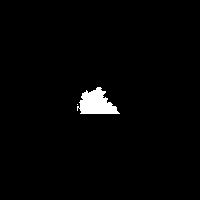

220390_71.png


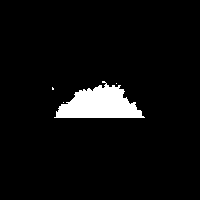

370824_2.png


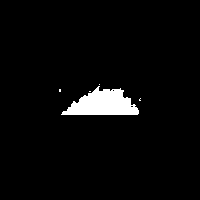

373443_1.png


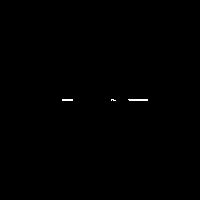

380472_8.png


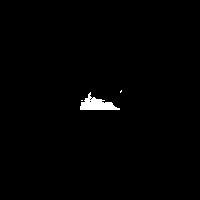

383498_2.png


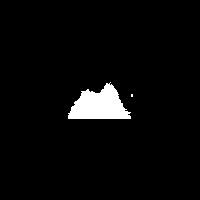

385883_2.png


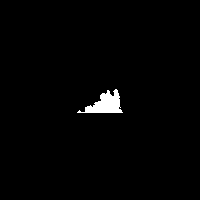

388587_1.png


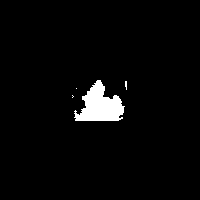

393492_9.png


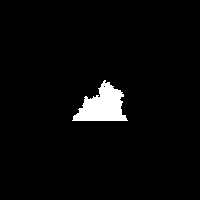

415274_1.png


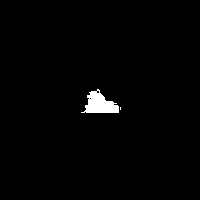

428725_20.png


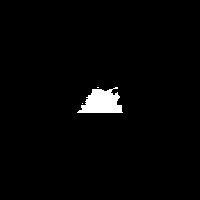

464980_23.png


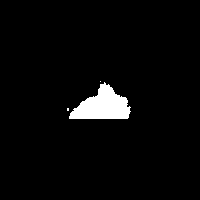

533565_28.png


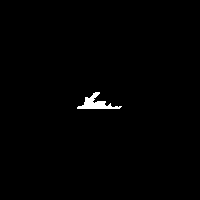

537819_4.png


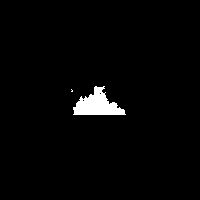

542977_3.png


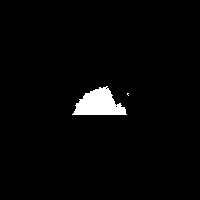

544311_7.png


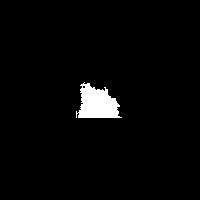

549999_2.png


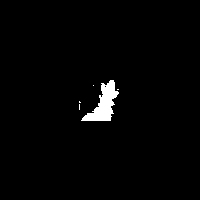

554810_2.png


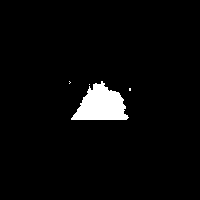

570290_1.png


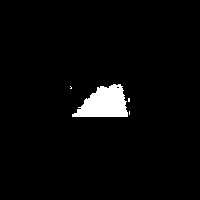

574989_7.png


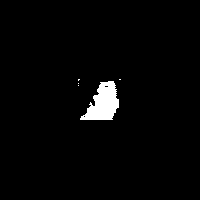

582217_2.png


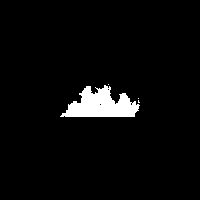

598022_2.png


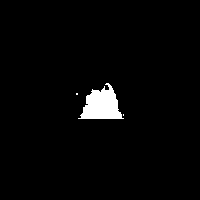

598185_5.png


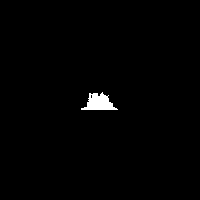

600916_1.png


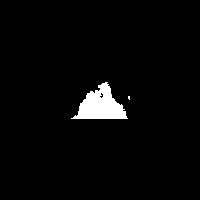

603842_2.png


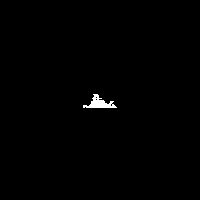

604437_6.png


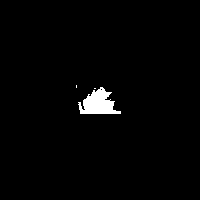

605387_1.png


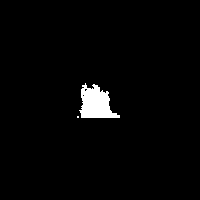

609958_2.png


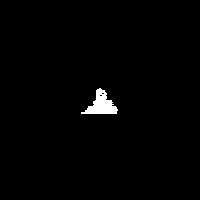

623784_1.png


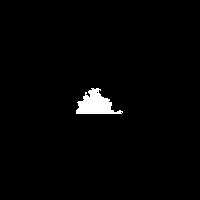

625102_1.png


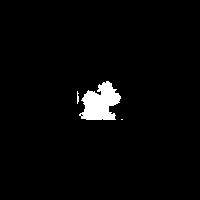

626949_1.png


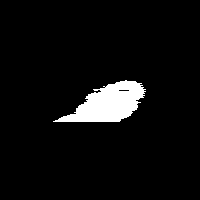

627920_1.png


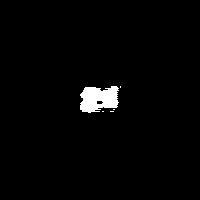

630981_2.png


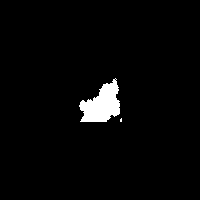

631666_1.png


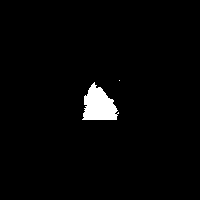

634011_1.png


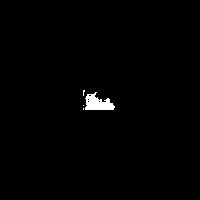

635814_1.png


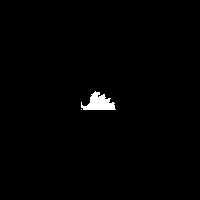

636608_2.png


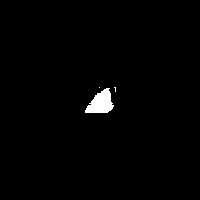

642890_1.png


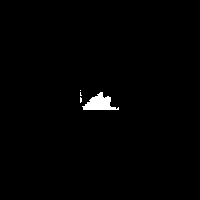

642925_2.png


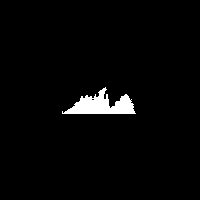

649804_1.png


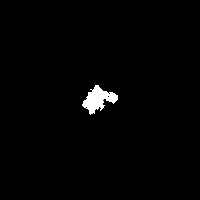

650006_1.png


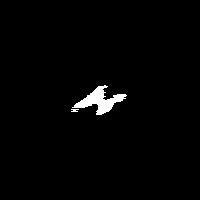

659783_1.png


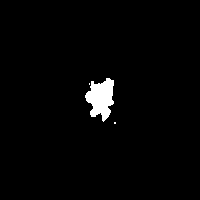

672661_1.png


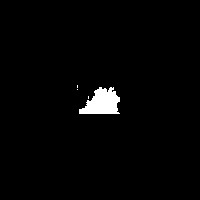

675566_3.png


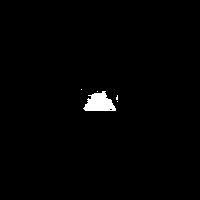

679719_2.png


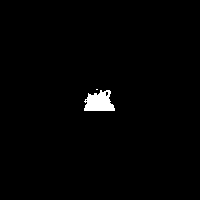

688183_1.png


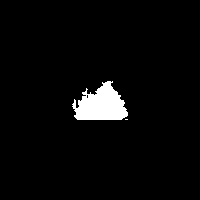

690150_1.png


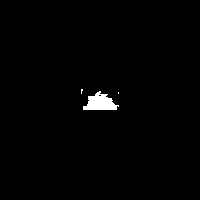

694769_2.png


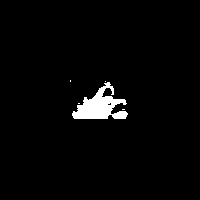

694961_1.png


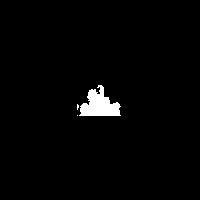

703498_1.png


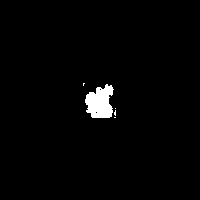

704630_1.png


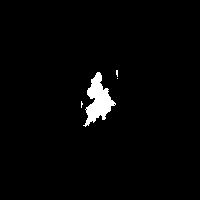

707516_1.png


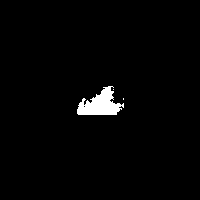

719356_1.png


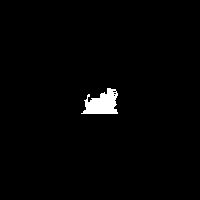

722548_1.png


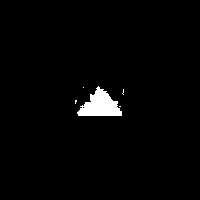

723162_1.png


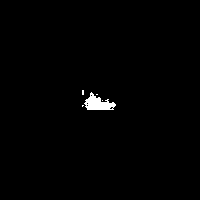

723283_1.png


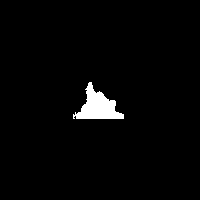

727031_1.png


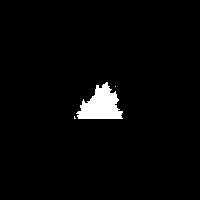

728303_2.png


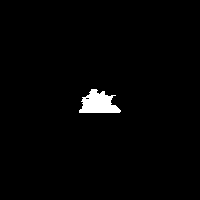

728348_1.png


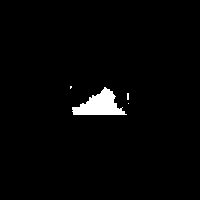

729361_1.png


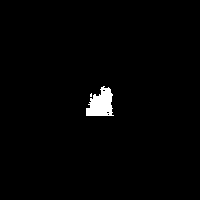

730271_1.png


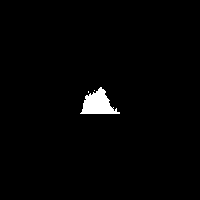

738992_1.png


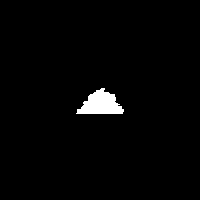

745437_1.png


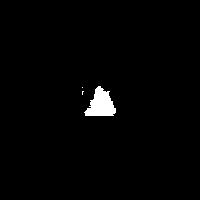

746660_2.png


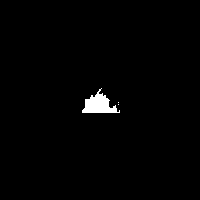

748580_1.png


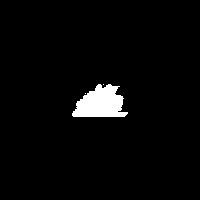

750225_1.png


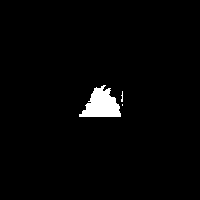

751488_3.png


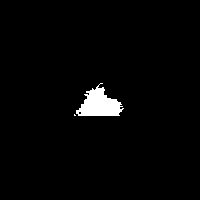

751678_1.png


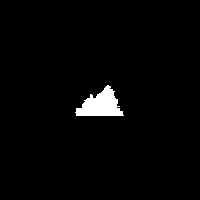

769735_2.png


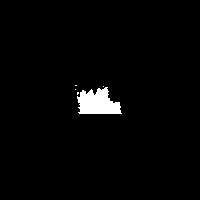

770197_1.png


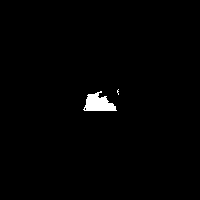

771787_1.png


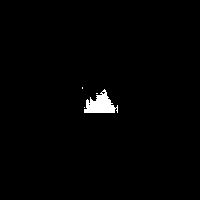

773171_1.png


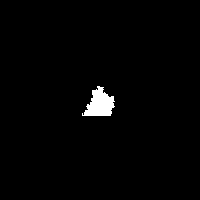

777689_1.png


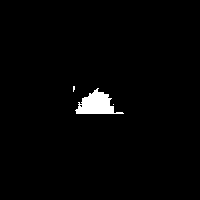

784010_1.png


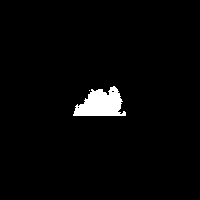

790230_1.png


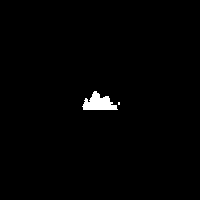

790266_2.png


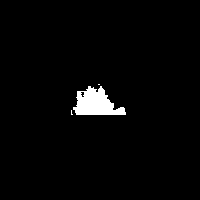

825080_1.png


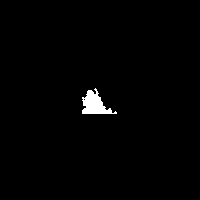

826777_1.png


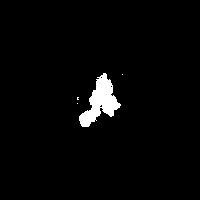

828377_1.png


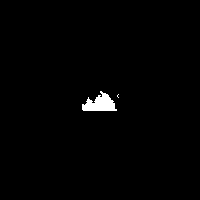

832797_1.png


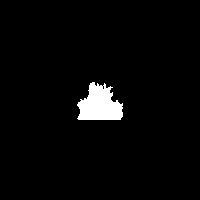

832868_1.png


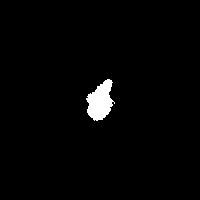

834150_1.png


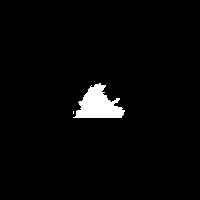

973309_102.png


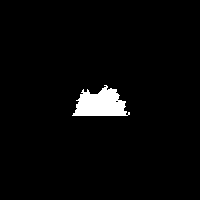

'i then manually looked at image to only have truncated ones in this directory'

In [6]:
# open all the images 
for i in range(len(file_list)):
    print(file_names[i])
    image = f'{file_list[i]}'
    img = Image.open(image)
    display(img)

'''i then manually looked at image to only have truncated ones in this directory'''

In [7]:
# get the particle name, then extract the rows
image_name = [particle[:-4] for particle in file_names]

## filter df according to the list of names
trunacted_img_df = df[df['name'].isin(image_name)]

In [8]:
n = 30
start = trunacted_img_df.iloc[30]['start_index']
end = trunacted_img_df.iloc[30]['end_index']


now open h5 file to mess around with it

In [9]:
h5_path = '/home/users/esree/data/Export_base220730153000.h5'
f2ds = h5py.File(h5_path,'r')

ds_image = f2ds['ImageData'] # shape (128, 200000) --> 128 pixels width, 200000 length
ds_time = f2ds['ImageTimes'] # shape (100000, 3) --> (rows, columns) related to time

# make time variable -> 3 seperate columns
og_t_xr = xr.Dataset({'ImageTimes': (('data', 'time_vars'),ds_time)})
sec_since = og_t_xr['ImageTimes'][:,0] # seconds since midnight UTC
pixel_slice = og_t_xr['ImageTimes'][:,1] # number of slices of pixel per image (contain -1, to fill)
# we can use pixel slice to correcly divide up data ^ the index to call f2ds['ImageData']
# these slices have been pre-determined by Jonny + algorithm he has written 

bit_time = og_t_xr['ImageTimes'][:,2] # 32 bit (instrument things) - not useful
## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# do cumulative sum of pixel slices -> can use this as index to slice + extract single crystals
pix_sum = pixel_slice.cumsum(dim='data', dtype ='int')

# shove together into a useful xarray 
time_xr = xr.Dataset({
    'sec_since': sec_since,
    'pixel_slice': pixel_slice,
    'bit_time': bit_time,
    'pix_sum': pix_sum})

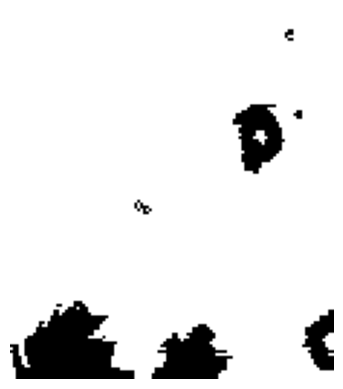

In [11]:
one_crystal = f2ds['ImageData'][:,start:end+70] # extract 1 crystal

plt.imshow(one_crystal, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

## find specif particle + slice raw h5 file

example ones
| Stretch/Untouched | ProbDistribution | Accuracy |
| --- | --- | --- |
| Stretched | Gaussian | .843 |

/tmp/ipykernel_531/1540195785.py:14: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s_idx = int(row['slice_s_idx'])
/tmp/ipykernel_531/1540195785.py:15: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  e_idx = int(row['slice_e_idx'])


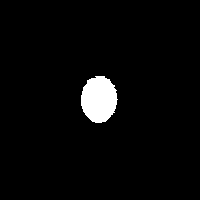

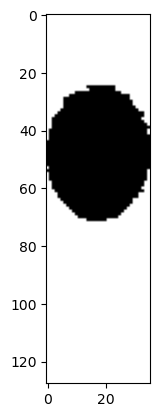

In [9]:
## this is the png name
particle_name = '37032_4' 
## known truncated: 318747_1, 325593_1, 459417_1, 421760_1
## list of truncated particles not captured:
# 482517_3, 458489_16 , 421540_3, 171668_2, 323553_2, 167311_2, 
## weird looking ones:
# 1000081_1, 1001384_1 (streak)
# WD: 37032_4, 183286_16
# column: 539874_1

row = df[df['name'] == particle_name]
#row['first_diode_trunc']

s_idx = int(row['slice_s_idx'])
e_idx = int(row['slice_e_idx'])

img = Image.open(f'{path}{particle_name}.png')
display(img)

## corresponding image from h5 file
one_crystal = f2ds['ImageData'][:,s_idx:e_idx] # extract 1 crystal

## some of the processing script:
binary_image = (one_crystal == 0)
labeled_image, num_features = label(binary_image) # identify connected true areas
props = regionprops(labeled_image) # creates quick list of properties describing each feature detected in the image.

props_dic = {}
for i in range(len(props)):
    particle_n = props[i]
    filled_part_n, spec_region_n = stats_description(particle_n,5)
    first_diode_n, last_diode_n = calc_truncation(one_crystal, filled_part_n)

    props_dic[f'particle_{i}'] = {}
    props_dic[f'particle_{i}']['filled_part'] = filled_part_n
    props_dic[f'particle_{i}']['spec_region'] = spec_region_n
    props_dic[f'particle_{i}']['trunc'] = [first_diode_n, last_diode_n]
    props_dic[f'particle_{i}']['coords'] = props[i].coords ## this is different to spec_region_n.coords. this looks at particle in whole context


###
plt.imshow(one_crystal, cmap='gray')
#plt.axis('off')  # Turn off axis labels
plt.show()

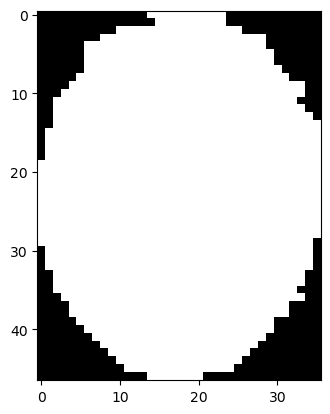

In [10]:
specif_particle = 'particle_0'
image_data = props_dic[specif_particle]['filled_part']
plt.imshow(image_data, cmap='gray')
#plt.axis('off')  # Turn off axis labels
plt.show()

### removing streak particles (vv elongated ones)
aspect ratio >10 -> remove

In [153]:
spec_region = props_dic[specif_particle]['spec_region']
print(f'eccentricity: {spec_region.eccentricity}')
aspect_ratio = spec_region.major_axis_length / spec_region.minor_axis_length
#print(f'area_convex: {spec_region.area_convex}')
print(f'aspect ratio: {aspect_ratio}')

eccentricity: 0.6368768605904045
aspect ratio: 1.2970748336100868


#### making new column of aspect ratio

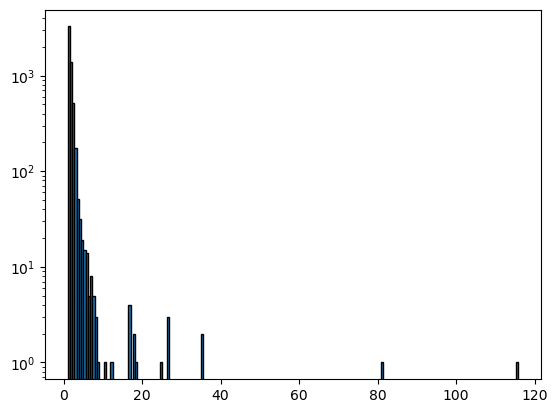

In [19]:
df['aspect_ratio'] = df['d_max'] / df['d_min']
aspect_ratio_values = list(df['aspect_ratio'])
#print(aspect_ratio_values)
plt.hist(aspect_ratio_values, bins=200, edgecolor='black')
plt.yscale('log')


1002353_1


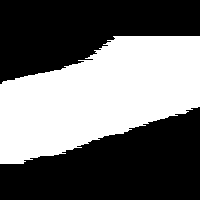

1003804_1


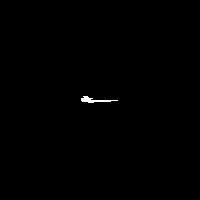

1003990_2


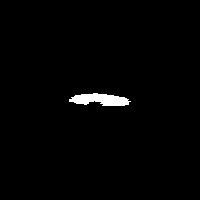

1007977_1


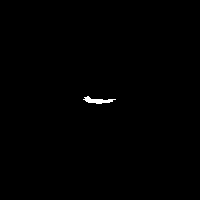

1009039_1


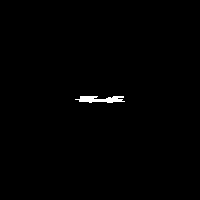

1009089_1


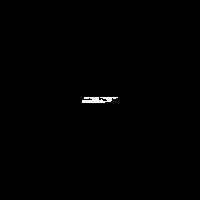

1032162_1


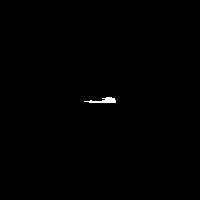

1033778_1


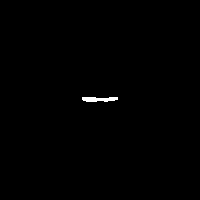

109194_1


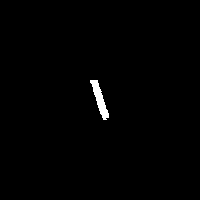

109246_1


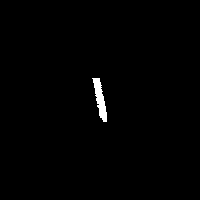

110143_22


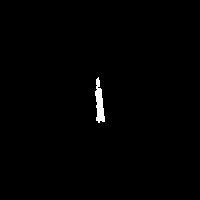

110861_11


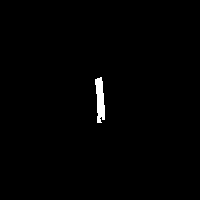

146054_1


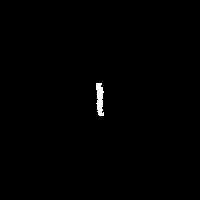

15051_1


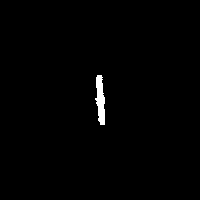

163773_1


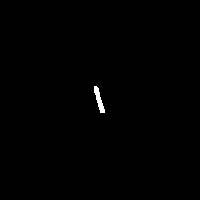

166032_1


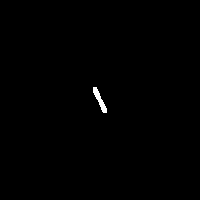

181938_1


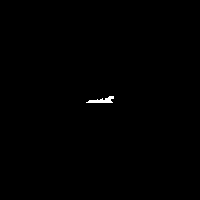

23613_74


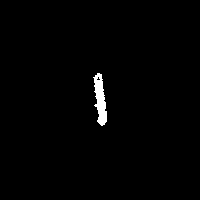

322776_1


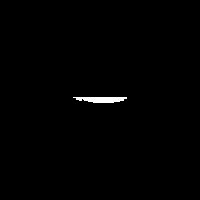

325446_1


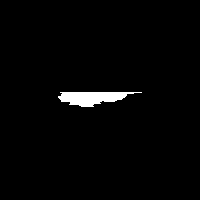

334618_1


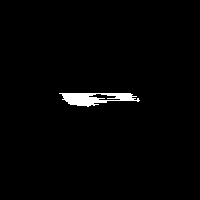

336869_3


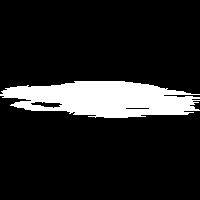

359026_1


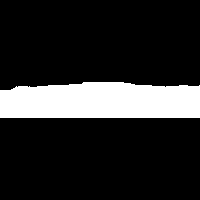

39035_1


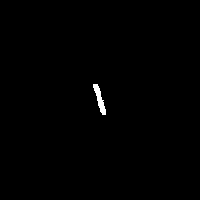

406458_1


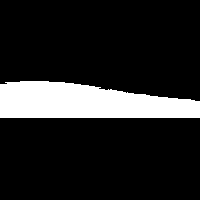

406930_2


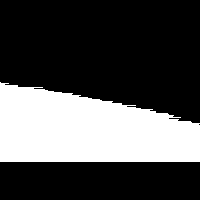

461533_1


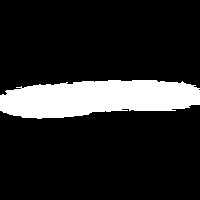

471621_2


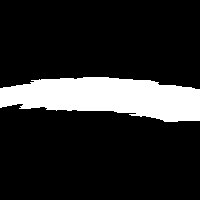

476260_1


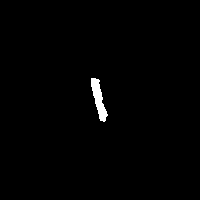

479495_4


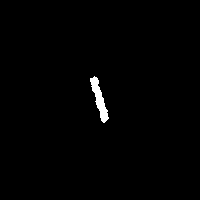

481330_1


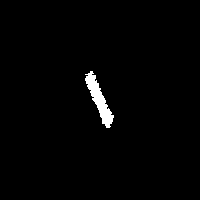

485739_6


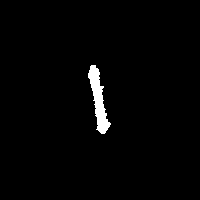

490495_1


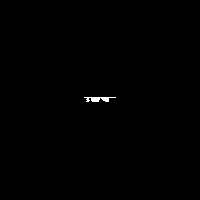

511463_7


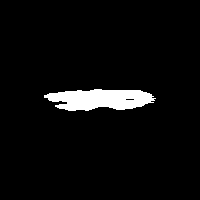

536951_1


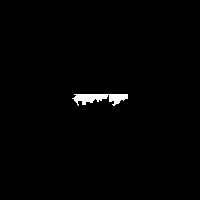

659904_1


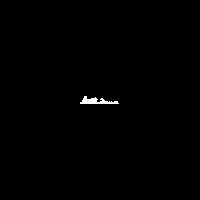

68061_1


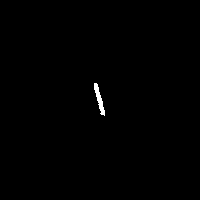

69927_1


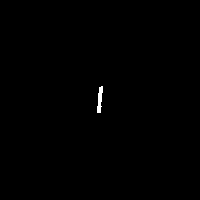

736265_1


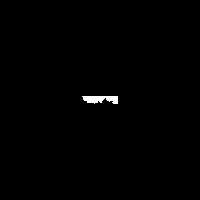

75537_10


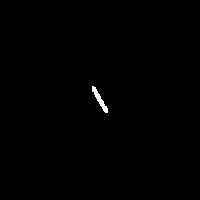

761354_1


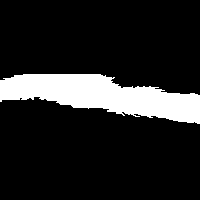

937143_2


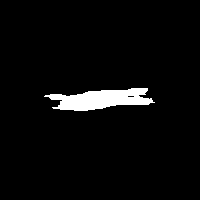

977110_6


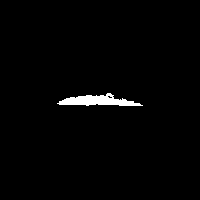

990322_1


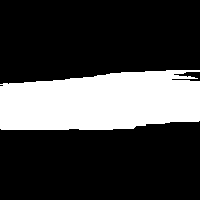

991702_1


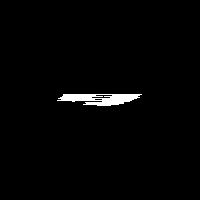

994627_1


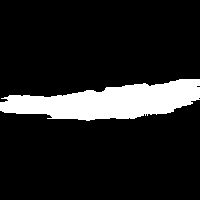

998481_1


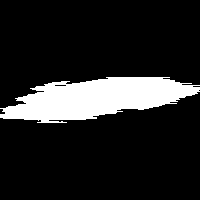

998690_1


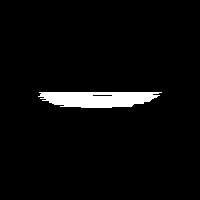

999333_1


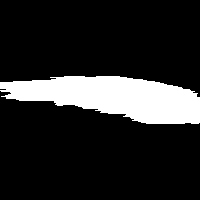

999568_1


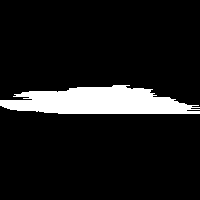

999778_1


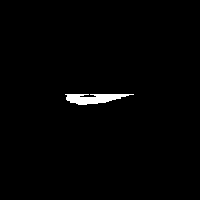

In [35]:
## slice out some of the weird images
weird_df = df[(df['aspect_ratio'] > 5) & (df['aspect_ratio'] < 10)]

# > 7 ?
weird_particles = list(weird_df['name'])

for particle in weird_particles:
    print(particle)
    img = Image.open(f'{path}{particle}.png')
    display(img)
'''
weird_aspect_r = list(weird_df['aspect_ratio'])
plt.hist(weird_aspect_r, bins='auto', edgecolor='black')
'''

weird_df.to_csv('weird_particles.csv', index=False)

(array([ 61., 173., 244., 374., 506., 602., 546., 408., 285., 243., 208.,
        165., 166., 157., 130., 125.,  99.,  95., 112.,  84.,  71.,  56.,
         61.,  46.,  44.,  48.,  28.,  28.,  24.,  27.,  29.,  20.,  20.,
         19.,  14.,   8.,   8.,   5.,   4.,   3.,   7.,   7.,   6.,   6.,
          6.,   4.,   3.,   8.,   5.,   3.,   4.,   2.,   3.,   1.,   2.,
          3.,   1.,   2.,   2.,   1.,   2.,   2.,   3.,   4.,   0.,   2.,
          1.,   3.,   1.,   2.,   2.,   1.,   2.,   2.,   1.,   3.,   1.,
          1.,   4.,   1.,   1.,   1.,   0.,   1.,   0.,   2.,   0.,   1.,
          0.,   0.,   1.,   0.,   1.,   3.,   1.,   1.,   0.,   1.,   1.,
          0.,   0.,   0.,   2.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00342508, 1.06592844, 1.1284318 , 1.19093516, 1.25343851,
        1.31594187, 1.37844523, 1.44094859, 1.50345195, 1.5659553 

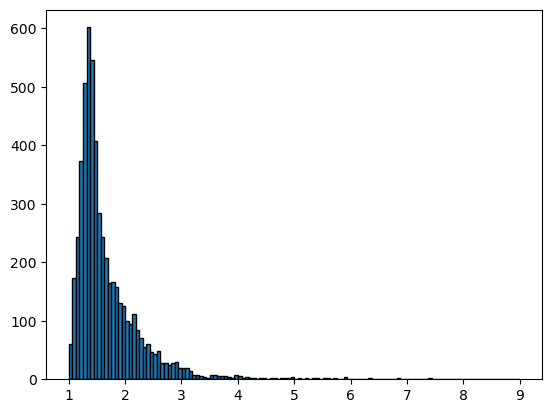

In [30]:
## non odd particles
normal_df = df[df['aspect_ratio'] < 10]

normal_ar = list(normal_df['aspect_ratio'])
plt.hist(normal_ar, bins='auto', edgecolor='black')


### truncation bits
using new method -> better truncation calculation

In [144]:
## some of the processing script:
binary_image = (one_crystal == 0)
labeled_image, num_features = label(binary_image) # identify connected true areas
props = regionprops(labeled_image) # creates quick list of properties describing each feature detected in the image.

props_dic = {}
for i in range(len(props)):
    particle_n = props[i]
    filled_part_n, spec_region_n = stats_description(particle_n,5)
    first_diode_n, last_diode_n = calc_truncation(one_crystal, filled_part_n)

    props_dic[f'particle_{i}'] = {}
    props_dic[f'particle_{i}']['filled_part'] = filled_part_n
    props_dic[f'particle_{i}']['spec_region'] = spec_region_n
    props_dic[f'particle_{i}']['trunc'] = [first_diode_n, last_diode_n]
    props_dic[f'particle_{i}']['coords'] = props[i].coords ## this is different to spec_region_n.coords. this looks at particle in whole context

In [129]:
coord_lst = props_dic[specif_particle]['coords']
first_d, last_d = calc_truncation_lol(coord_lst)

n_diode_1 = props_dic[specif_particle]['trunc'][0]
n_diode_127 = props_dic[specif_particle]['trunc'][1]

print(f'first: {first_d}, last: {last_d}')
print(f'first: {n_diode_1}, last: {n_diode_127}')

first: 0, last: 0
first: 0, last: 0
